
# Working with Custom Images



## The Data

-----------

## PLEASE NOTE: THIS DATASET IS VERY LARGE.

--------
----------
--------

ORIGINAL DATA SOURCE:

The dataset contains four folders:

* Image Data Folder
    * training set
        * cats
        * dogs
        * ...
    * test set
        * cats
        * dogs
        * ...

And a total of 12,501 cat images, and 12,501 dog images.

Acknowledgements
This Dataset is taken from the Microsoft Website: https://www.microsoft.com/en-us/download/details.aspx?id=54765

**Note: We will be dealing with real image files. Which means a large part of this process will be learning how to work with and deal with large groups of image files. This is too much data to fit in memory as a numpy array, so we'll need to feed it into our model in batches. **

### Visualizing the Data


-------
Let's take a closer look at the data.

In [76]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


**Ensure your data is unzipped and you're able to locate it within your computer.**

In [79]:
my_data_dir = 'dataset'

In [80]:
my_data_dir = 'dataset'
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
test_path = my_data_dir+'\\test_set\\'
train_path = my_data_dir+'\\training_set\\'


In [ ]:
print(os.listdir(my_data_dir))
print(os.listdir(test_path))

In [ ]:
os.listdir(train_path)

In [ ]:
os.listdir(train_path+'dogs')[1]

dog.1034.jpg
(197, 149, 3)


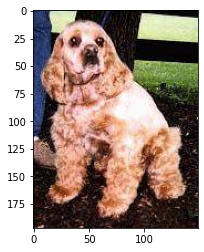

In [131]:
print(os.listdir(train_path+'dogs')[40])
dog_sample = train_path+'\\dogs'+'\\dog.40.jpg'
dog_img= imread(dog_sample)
plt.imshow(dog_img);
print(dog_img.shape)

cat.2.jpg
(375, 499, 3)


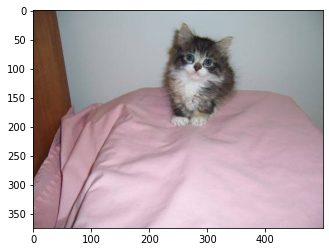

In [141]:
print(os.listdir(train_path+'cats')[1111])
cat_sample = train_path+'\\cats'+'\\cat.1111.jpg'
cat_img= imread(cat_sample)
plt.imshow(cat_img);
print(cat_img.shape)

**Let's check how many images there are.**

In [111]:
print(len(os.listdir(train_path+'\\dogs')))
print(len(os.listdir(train_path+'\\cats')))
print(len(os.listdir(test_path+'\\dogs')))
print(len(os.listdir(test_path+'\\cats')))

4000
4000
1000
1000


**Let's find out the average dimensions of these images.**

In [142]:
cat_img.shape
dog_img.shape

(375, 499, 3)

#### And perform some visualisations

In [117]:
print(dog_img.shape)
print(cat_img.shape)

# Other options: https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
dim3 = []
dim4 = []
for image_filename in os.listdir(test_path+'\\dogs'):
    img = imread(test_path+'dogs'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
for image_filename in os.listdir(test_path+'\\cats'):
    img = imread(test_path+'cats'+'\\'+image_filename)
    d3,d4,colors = img.shape
    dim3.append(d3)
    dim4.append(d4)

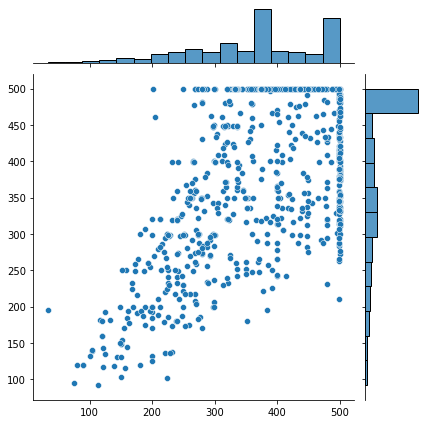

In [143]:
sns.jointplot(dim1,dim2);

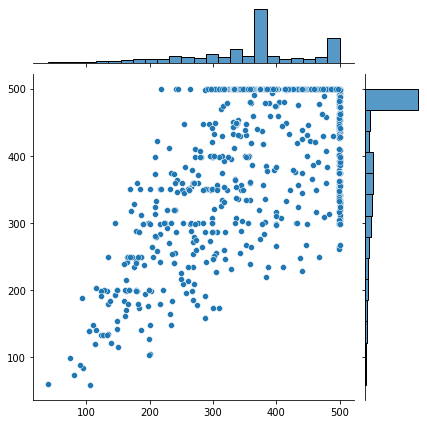

In [144]:
sns.jointplot(dim3,dim4);

In [23]:
np.mean(dim1)

365.171

In [148]:
print(f'Dog test, x: {np.mean(dim1)}')
print(f'Dog test, y: {np.mean(dim2)}')
print(f'Cat test, x: {np.mean(dim3)}')
print(f'Cat test, y: {np.mean(dim4)}')

Dog test, x: 365.171
Dog test, y: 396.317
Cat test, x: 356.267
Cat test, y: 413.064


Cat test: 356.267


413.064

In [25]:
image_shape = (250,250,3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [149]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

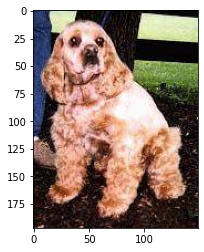

In [153]:
plt.imshow(dog_img)

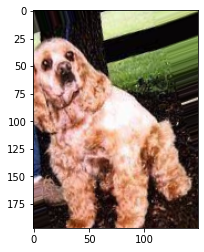

In [154]:
plt.imshow(image_gen.random_transform(dog_img))

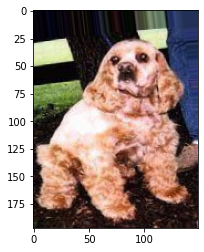

In [156]:
plt.imshow(image_gen.random_transform(dog_img))

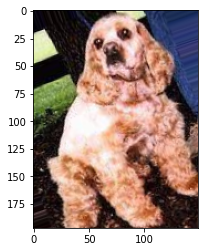

In [157]:
plt.imshow(image_gen.random_transform(dog_img))

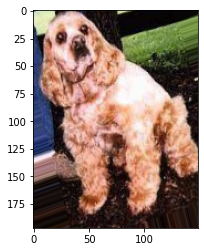

In [158]:
plt.imshow(image_gen.random_transform(dog_img))

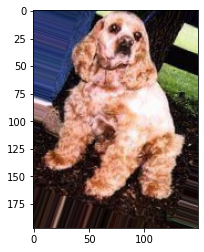

In [159]:
plt.imshow(image_gen.random_transform(dog_img))

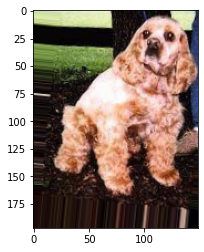

In [160]:
plt.imshow(image_gen.random_transform(dog_img))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [161]:
image_gen.flow_from_directory(train_path)
image_gen.flow_from_directory(test_path)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Creating the Model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [35]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('swish'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.2))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 53824)             0

## Early Stopping

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Training the Model

In [39]:
help(image_gen.flow_from_directory)

Help on method flow_from_directory in module tensorflow.python.keras.preprocessing.image:

flow_from_directory(directory, target_size=(256, 256), color_mode='rgb', classes=None, class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest') method of tensorflow.python.keras.preprocessing.image.ImageDataGenerator instance
    Takes the path to a directory & generates batches of augmented data.
    
    Arguments:
        directory: string, path to the target directory. It should contain one
          subdirectory per class. Any PNG, JPG, BMP, PPM or TIF images inside
          each of the subdirectories directory tree will be included in the
          generator. See [this script](
            https://gist.github.com/fchollet/0830affa1f7f19fd47b06d4cf89ed44d)
              for more details.
        target_size: Tuple of integers `(height, width)`, defaults to `(256,
         

In [40]:
batch_size = 32

In [163]:
print('Processing training images')
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(250,250),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')
print('Processing testing images')
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(250,250),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Processing training images
Found 8000 images belonging to 2 classes.
Processing testing images
Found 2000 images belonging to 2 classes.


In [44]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [45]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
results = model.fit(train_image_gen,epochs=50,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

250/250 [==============================] - 237s 949ms/step - loss: 0.2625 - accuracy: 0.8880 - val_loss: 0.3633 - val_accuracy: 0.8530


In [192]:
from tensorflow.keras.models import load_model

In [194]:
model = load_model('cat_dog_detector.h5')

# Evaluating the Model

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

In [197]:
model.metrics_names

['loss', 'accuracy']

In [198]:
model.evaluate_generator(test_image_gen)

[0.3479582965373993, 0.859000027179718]

In [52]:
from tensorflow.keras.preprocessing import image

In [53]:
# https://datascience.stackexchange.com/questions/13894/how-to-get-predictions-with-predict-generator-on-streaming-test-data-in-keras
pred_probabilities = model.predict(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [54]:
pred_probabilities

array([[0.99614197],
       [0.16947518],
       [0.01064979],
       ...,
       [0.00906021],
       [0.63585776],
       [0.9997241 ]], dtype=float32)

In [55]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
predictions = pred_probabilities > 0.5

In [57]:
# Numpy can treat this as True/False for us
predictions

array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1000
           1       0.84      0.88      0.86      1000

    accuracy                           0.85      2000
   macro avg       0.86      0.85      0.85      2000
weighted avg       0.86      0.85      0.85      2000



In [166]:
confusion_matrix(test_image_gen.classes,predictions)

array([[831, 169],
       [121, 879]], dtype=int64)

# Predicting on an Image

In [206]:
# Your file path will likely be different!
dog_cell = 'dataset\\single_prediction\\cat_or_dog_1.jpg'
cat_cell = 'dataset\\single_prediction\\cat_or_dog_2.jpg'
my_image_a = image.load_img(dog_cell,target_size=image_shape)
my_image_b = image.load_img(cat_cell,target_size=image_shape)


In [207]:
my_image_a = image.load_img(dog_cell,target_size=image_shape)
my_image_b = image.load_img(cat_cell,target_size=image_shape)

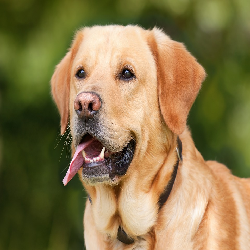

In [208]:
my_image_a

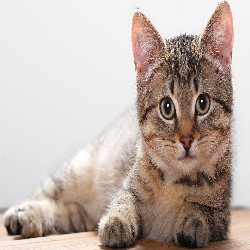

In [209]:
my_image_b

In [ ]:
train_image_gen.class_indices

In [ ]:
print(type(my_image_a))
my_image_a = image.img_to_array(my_image_a)
print(type(my_image_a))
print(my_image_a.shape)
my_image_a = np.expand_dims(my_image_a, axis=0)
print(my_image_a.shape)
model.predict(my_image_a)

In [ ]:
print(type(my_image_b))
my_image_b = image.img_to_array(my_image_b)
print(type(my_image_b))
print(my_image_b.shape)
my_image_b = np.expand_dims(my_image_b, axis=0)
print(my_image_b.shape)
model.predict(my_image_b)

# Done!